![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [31]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

In [32]:
netflix_df = pd.read_csv('netflix_data.csv')

In [33]:
netflix_subset = netflix_df[netflix_df['type'] == "Movie"]

In [34]:
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

In [35]:
short_movies = netflix_movies[netflix_movies.duration < 60]

Inspecting short movies

In [36]:
# Inspecting results to find possible contribution factors - look at correlation with a year
corr_year = short_movies['release_year'].corr(short_movies['duration'])
corr_year

-0.037803952496084856

<function matplotlib.pyplot.show(close=None, block=None)>

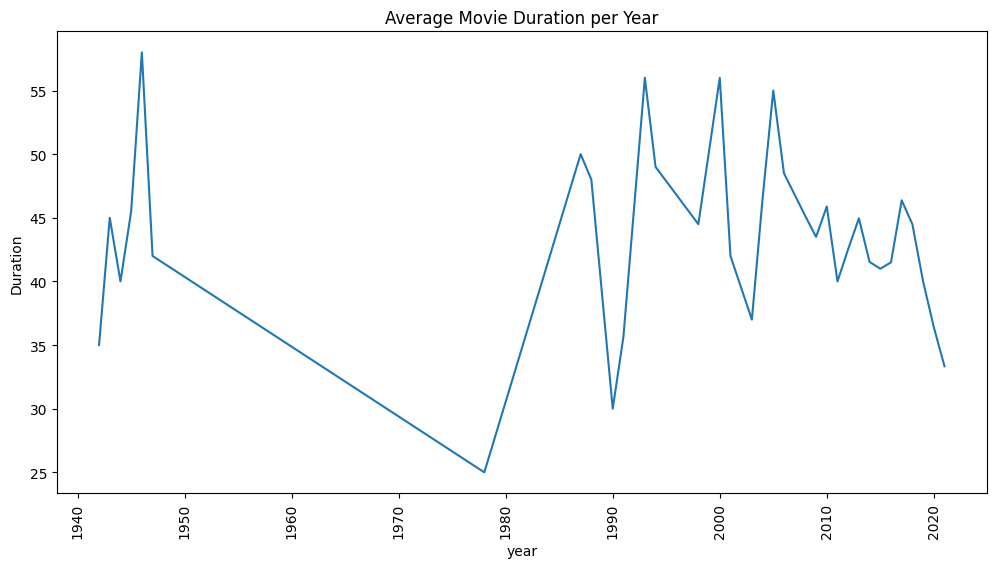

In [37]:
# Plot the average duration per year 
short_movies['avg_dur_year']=short_movies.groupby('release_year')['duration'].transform('mean')
short_movies.sort_values(by='release_year', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(short_movies['release_year'], short_movies['avg_dur_year'])
plt.xlabel('year')
plt.ylabel('Duration')
plt.title('Average Movie Duration per Year')
plt.xticks(rotation=90)

plt.show


In [38]:
short_movies.isnull().sum()

title            0
country         66
genre            0
release_year     0
duration         0
avg_dur_year     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

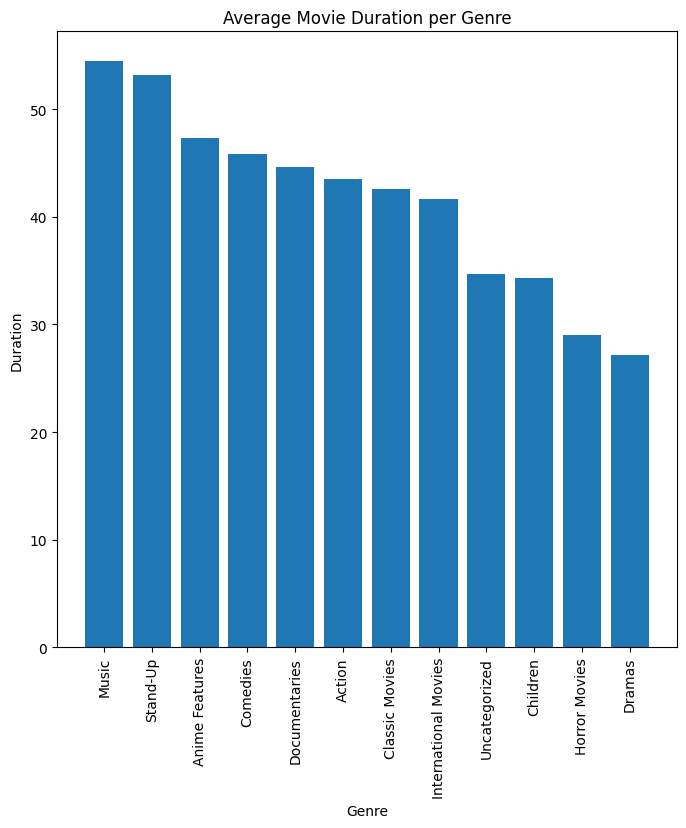

In [39]:
# Plot average movie duration per genre
# Calculate the averages
short_movies['avg_dur_genre'] = short_movies.groupby('genre')['duration'].transform('mean')

# Sort values by average duration for more representative plot
short_movies.sort_values(by='avg_dur_genre', ascending=False, inplace=True)


plt.figure(figsize=(8, 8))
plt.bar(short_movies['genre'], short_movies['avg_dur_genre'])
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.title('Average Movie Duration per Genre')
plt.xticks(rotation=90)

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

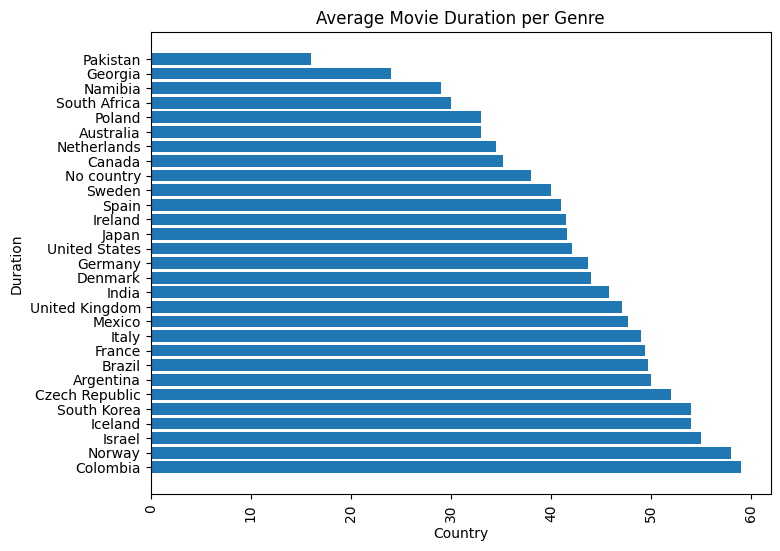

In [40]:
# Plot movie duration per country 

# Impute null values with another category - 'no country'
short_movies['country'].fillna('No country',inplace=True)

# Calculate averages per country and sort by those values
short_movies['avg_dur_country'] = short_movies.groupby('country')['duration'].transform('mean')
short_movies.sort_values(by= 'avg_dur_country',ascending = False,  inplace = True)

# Make a plot
plt.figure(figsize=(8, 6))
plt.barh(short_movies['country'], short_movies['avg_dur_country'])
plt.xlabel('Country')
plt.ylabel('Duration')
plt.title('Average Movie Duration per Country')
plt.xticks(rotation=90)

plt.show

Assign colours for given genres using foor loop

In [41]:
# Initialise empty list to store the colors
colors = []

# Iterate through rows of netflix_movies 

for index, row in netflix_movies.iterrows():
    genre=row['genre']
    
    # Assign the colors respectively
    if genre =='Children':
        colors.append('green')
    
    elif genre == 'Documentaries':
        colors.append('blue')
        
    elif genre == 'Stand-Up':
        colors.append('red')
    
    else:
        colors.append('grey')

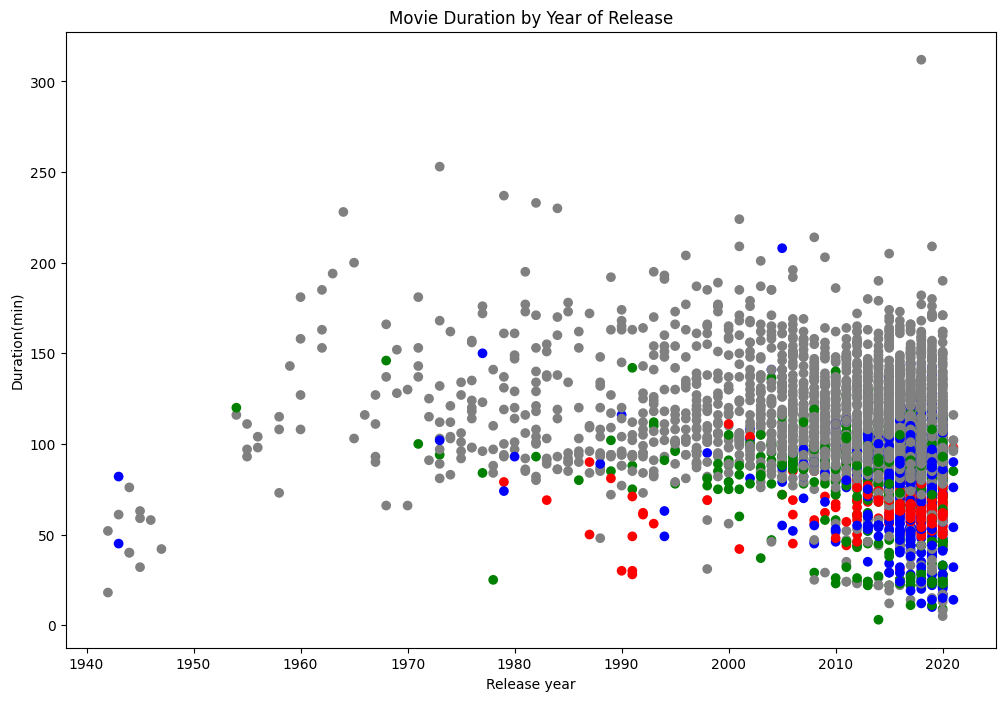

In [42]:
# Initialise figure object
fig, ax = plt.subplots(figsize = (12,8))


# Create a scatterplot
plt.scatter(netflix_movies['release_year'],netflix_movies['duration'], c=colors)

# Set labels for the x and y axes
ax.set_xlabel("Release year")
ax.set_ylabel("Duration(min)")
# Set the title of the plot
ax.set_title("Movie Duration by Year of Release")

# Show the plot
plt.show()


In [43]:
answer = "maybe"